In [ ]:
from utils.utils import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.LSTM import *
import yaml

In [2]:
# with open("config.yaml", 'r') as file:
#             config_data = yaml.safe_load(file)
            
# dfs = dowload_tickers(config_data)

stock = "AMD"

df = pd.read_csv(f"./prices/{stock}_prices.csv", index_col=0, parse_dates=True)

In [3]:
start_day    = "2025-01-01"

horizon_days = 50                           # cantidad de días hábiles a predecir
training_years = 2                         # años previos para entrenar y predecir cada día

feat_cols = ["Close"]

In [4]:
# TRAINING
##########
results = []
for epochs in [10, 20, 30, 40, 50, 60, 70, 80]:
    res = walk_forward_predict(     LSTMRegressor,
                                    df, 
                                    start_day, 
                                    horizon_days,
                                    training_years=training_years,
                                    feat_cols=feat_cols,

                                    W=50,
                                    
                                    hidden_size=64, 
                                    num_layers=2, 
                                    dropout=0.1,
                                    hit_coef=0.5,
                                    batch_size=5, 
                                    epochs=epochs, 
                                    lr=0.01,

                                    patience=5,
                                    loss_validation=True,
                                    
                                    torch_seed=0
                                )
    
    res_df = res[0]
    mse = float(np.mean((res_df["y_pred_norm"] - res_df["y_true_norm"])**2))
    print(f"epochs = {epochs} | MSE = {mse}")
    results.append({
        "stock": stock,
        "epochs":epochs,
        "res":res,
        "mse":mse
    })

Processing test days:   0%|          | 0/50 [00:00<?, ?it/s]

Processing test days: 100%|██████████| 50/50 [02:28<00:00,  2.98s/it]


epochs = 10 | MSE = 0.0008883433778310123


Processing test days: 100%|██████████| 50/50 [03:14<00:00,  3.89s/it]


epochs = 20 | MSE = 0.0007405109211949746


Processing test days: 100%|██████████| 50/50 [03:15<00:00,  3.91s/it]


epochs = 30 | MSE = 0.0007602716718960362


Processing test days: 100%|██████████| 50/50 [03:14<00:00,  3.89s/it]


epochs = 40 | MSE = 0.0007602716718960362


Processing test days: 100%|██████████| 50/50 [03:14<00:00,  3.89s/it]


epochs = 50 | MSE = 0.0007602716718960362


Processing test days: 100%|██████████| 50/50 [03:15<00:00,  3.90s/it]


epochs = 60 | MSE = 0.0007602716718960362


Processing test days: 100%|██████████| 50/50 [03:14<00:00,  3.89s/it]


epochs = 70 | MSE = 0.0007602716718960362


Processing test days: 100%|██████████| 50/50 [03:15<00:00,  3.91s/it]

epochs = 80 | MSE = 0.0007602716718960362


best epochs 20


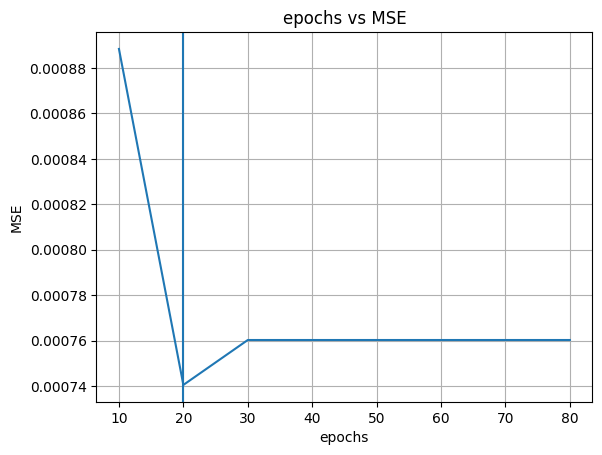

In [5]:
mses = [res["mse"] for res in results]
epochs = [res["epochs"] for res in results]

mse_min = float("inf")
for i in range(len(mses)):
    if mses[i] < mse_min:
        mse_min = mses[i]
        epoch = epochs[i]

print(f"best epochs {epoch}")

plt.plot(epochs, mses)
plt.title("epochs vs MSE")
plt.axvline(x=epoch)
plt.ylabel("MSE")
plt.xlabel("epochs")
plt.grid()